In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from PIL import Image
import pycocotools
import pycocotools.mask
import tqdm.auto
import numpy as np

from segmentation import cutting

In [4]:
from segmentation.gcp import upload_blob

upload_blob("./data/cutouts2/00000001_00006.webp", "cutouts/v1/foo.webp")

File ./data/cutouts2/00000001_00006.webp uploaded to cutouts/v1/foo.webp.


In [5]:
def random_color():
    return (*np.random.randint(0, 255, 3), 128)


def add_overlay(image, annotation):
    # print(annotation)
    mask = pycocotools.mask.decode(annotation["segmentation"])

    color = random_color()
    color_mask = np.zeros((*mask.shape, 4), dtype=np.uint8)
    color_mask[mask == 1] = color

    return Image.alpha_composite(image.convert("RGBA"), Image.fromarray(color_mask))

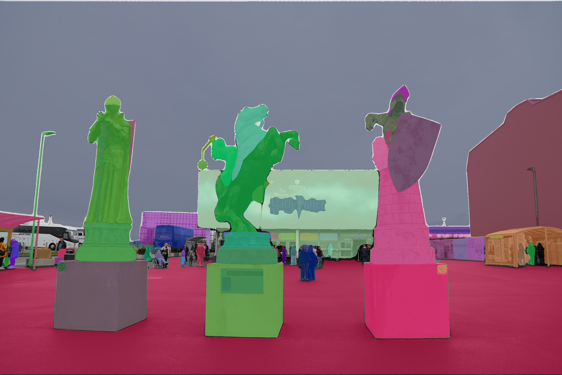

In [4]:
image_index = 4
image, annotations = cutting.load(image_index)

for annotation in annotations:
    image = add_overlay(image, annotation)

image.resize((image.width // 4, image.height // 4))

In [5]:
image, annotations = cutting.load(image_index)

In [11]:
hasattr(tqdm.auto.trange(40), "__len__")

  0%|          | 0/40 [00:00<?, ?it/s]

True

In [1]:
from pathlib import Path
from segmentation.cutting import save_cutouts
from segmentation import cutting


save_cutouts(Path("cutouts"), max_n_images=11187, parallel=True)

  0%|          | 0/11186 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
best = 0

for image_index in tqdm.auto.trange(1, 11187):
    image, annotations = cutting.load(image_index)
    if len(annotations) > best:
        print(image_index, len(annotations))
        best = max(best, len(annotations))

  0%|          | 0/11186 [00:00<?, ?it/s]

1 65
3 137
8 224
27 280
47 323
168 388
319 423
465 452
755 461
1166 490
1511 659
3095 845


In [10]:
f"{3:04d}"

'0003'

In [106]:
import multiprocessing


def save_cutouts_for_index(image_index):
    for crop_index, crop in enumerate(cutting.extract_cutouts(image_index)):
        crop.save(f"cutouts/{image_index}_{crop_index}.png")


with multiprocessing.Pool(8) as pool:
    image = pool.starmap(save_cutouts_for_index, tqdm.auto.trange(1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Process SpawnPoolWorker-1:
Process SpawnPoolWorker-2:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/homebrew/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/homebrew/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/opt/homebrew/Cellar/python@3.11/3.11.2_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
 

KeyboardInterrupt: 

In [105]:
import tqdm.auto

for image_index in tqdm.auto.trange(1, 1000):
    # print(image_index)
    for crop_index, crop in enumerate(cutting.extract_cutouts(image_index)):
        crop.save(f"cutouts/{image_index}_{crop_index}.png")

  0%|          | 0/999 [00:00<?, ?it/s]

KeyboardInterrupt: 

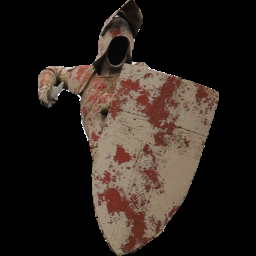

(256, 256)


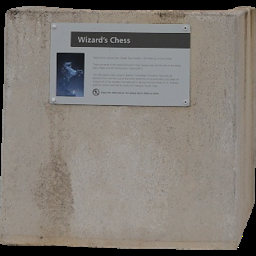

(256, 256)


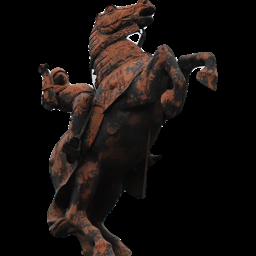

(256, 256)


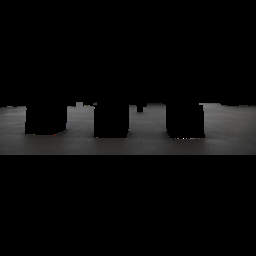

(256, 256)


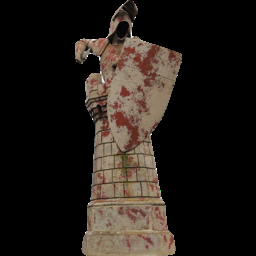

(256, 256)


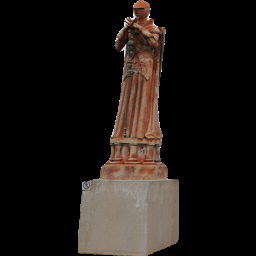

(256, 256)


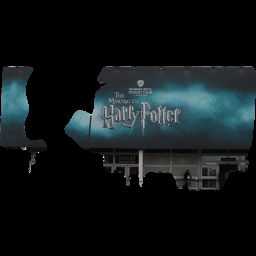

(256, 256)


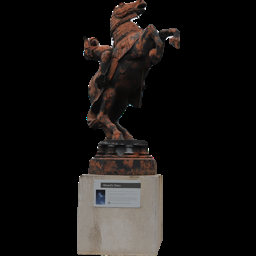

(256, 256)


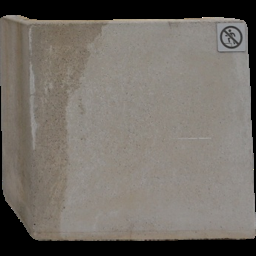

(256, 256)


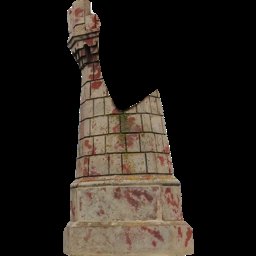

(256, 256)


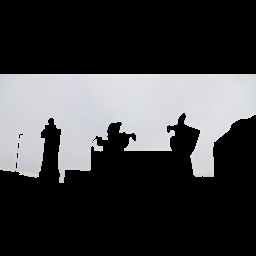

(256, 256)


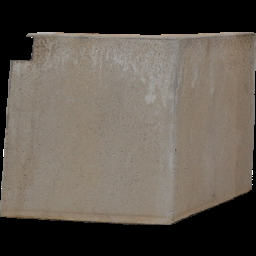

(256, 256)


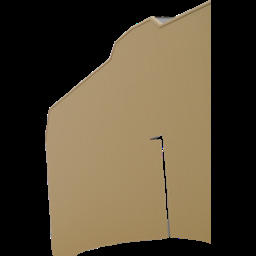

(256, 256)


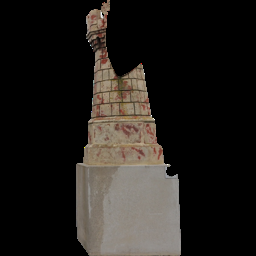

(256, 256)


In [39]:
from IPython.display import display

for annotation in annotations:
    mask = pycocotools.mask.decode(annotation["segmentation"])

    image.putalpha(Image.fromarray(mask * 255, mode="L"))
    crop = image.crop(image.getbbox())

    if crop.width < 256 or crop.height < 256:
        continue

    display(crop.convert("RGB"))
    print(crop.size)

In [54]:
cutout = list(cutting.extract_cutouts(7))[2]

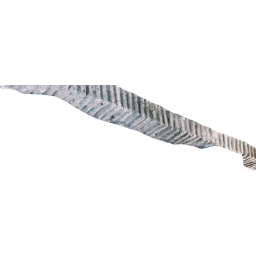

In [56]:
# flip by 180
cutout = cutout.transpose(Image.ROTATE_180)
cutout